# Genre Co-occurrence Analysis

This Jupyter Notebook performs data analysis on the `anime.csv` dataset, focusing on the co-occurrence of genres. The analysis includes data processing, frequency counting, and visualizations to explore relationships between different genre combinations. Below is a summary of the contents:

1. **Data Import and Initial Setup**:
   - Import necessary libraries: `pandas`, `seaborn`, `matplotlib.pyplot`, `itertools`, and `collections`.
   - Load the dataset: `anime.csv`.

2. **Genre Pair Extraction**:
   - Split the 'genre' column and create a list of all possible genre combinations for each anime.

3. **Counting Genre Pairs**:
   - Flatten the list of genre combinations and count the occurrences of each genre pair using `Counter`.

4. **Data Analysis and Visualization**:
   - **Genre Co-occurrence Heatmap**:
     - Generate a heatmap to visualize the co-occurrence of genres across the dataset.
   - **Top 10 Genre Pairs**:
     - Identify and visualize the top 10 most common genre pairs in a separate heatmap.

5. **Insights**:
   - The notebook provides insights into which genres frequently appear together, highlighting popular genre combinations in anime.
   - Understanding these combinations can help in identifying audience preferences and trends in anime production.

This notebook serves as a comprehensive analysis tool for understanding genre relationships in the anime dataset, offering visualizations that highlight key co-occurrences and trends.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Load the dataset
anime_df = pd.read_csv('anime.csv')

In [16]:
# Split genres and create a list of genre combinations for each anime
genre_combinations = anime_df['genre'].dropna().apply(lambda x: list(combinations(x.split(', '), 2)))
genre_combinations

0        [(Drama, Romance), (Drama, School), (Drama, Su...
1        [(Action, Adventure), (Action, Drama), (Action...
2        [(Action, Comedy), (Action, Historical), (Acti...
3                                     [(Sci-Fi, Thriller)]
4        [(Action, Comedy), (Action, Historical), (Acti...
                               ...                        
12289                                                   []
12290                                                   []
12291                                                   []
12292                                                   []
12293                                                   []
Name: genre, Length: 12232, dtype: object

In [17]:
# Flatten the list of lists and count occurrences of each genre pair
genre_pairs = [pair for sublist in genre_combinations for pair in sublist]
genre_pair_counts = Counter(genre_pairs)
print(genre_pair_counts)

Counter({('Action', 'Sci-Fi'): 1034, ('Adventure', 'Fantasy'): 951, ('Comedy', 'Shounen'): 940, ('Adventure', 'Comedy'): 916, ('Action', 'Adventure'): 891, ('Comedy', 'Fantasy'): 869, ('Action', 'Comedy'): 858, ('Action', 'Shounen'): 786, ('Comedy', 'Romance'): 769, ('Comedy', 'School'): 758, ('Mecha', 'Sci-Fi'): 719, ('Action', 'Fantasy'): 705, ('Adventure', 'Shounen'): 700, ('Comedy', 'Slice of Life'): 699, ('Adventure', 'Sci-Fi'): 649, ('Comedy', 'Sci-Fi'): 633, ('Action', 'Mecha'): 583, ('Comedy', 'Kids'): 562, ('Drama', 'Romance'): 547, ('Fantasy', 'Kids'): 523, ('Sci-Fi', 'Shounen'): 476, ('Action', 'Drama'): 475, ('Comedy', 'Ecchi'): 473, ('Comedy', 'Drama'): 449, ('Fantasy', 'Magic'): 444, ('Adventure', 'Kids'): 429, ('Drama', 'Sci-Fi'): 424, ('Fantasy', 'Shounen'): 407, ('Romance', 'School'): 400, ('Action', 'Supernatural'): 396, ('Adventure', 'Drama'): 394, ('Comedy', 'Supernatural'): 373, ('Comedy', 'Magic'): 369, ('Comedy', 'Parody'): 353, ('Action', 'Super Power'): 343, ('

In [18]:
# Create a DataFrame from the Counter object
co_occurrence_df = pd.DataFrame(genre_pair_counts.items(), columns=['Genre Pair', 'Count'])

# Split the Genre Pair into two separate columns
co_occurrence_df[['Genre1', 'Genre2']] = pd.DataFrame(co_occurrence_df['Genre Pair'].tolist(), index=co_occurrence_df.index)

# Create a pivot table for the heatmap
heatmap_data = co_occurrence_df.pivot(index='Genre1', columns='Genre2', values='Count').fillna(0)
heatmap_data

Genre2,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
Genre1,,,,,,,,,,,,,,,,,,,,,
Action,891.0,29.0,858.0,11.0,134.0,475.0,188.0,705.0,77.0,68.0,...,7.0,27.0,212.0,128.0,343.0,396.0,28.0,49.0,4.0,3.0
Adventure,0.0,12.0,916.0,5.0,76.0,394.0,72.0,951.0,59.0,16.0,...,5.0,64.0,122.0,34.0,120.0,206.0,4.0,8.0,0.0,0.0
Cars,0.0,0.0,8.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,35.0,0.0,1.0,0.0,0.0,0.0,0.0
Comedy,0.0,0.0,0.0,24.0,76.0,449.0,473.0,869.0,51.0,208.0,...,36.0,699.0,74.0,214.0,214.0,373.0,8.0,37.0,10.0,12.0
Dementia,0.0,0.0,0.0,0.0,0.0,15.0,2.0,13.0,1.0,0.0,...,1.0,1.0,2.0,0.0,0.0,11.0,1.0,0.0,0.0,0.0
Demons,0.0,0.0,0.0,0.0,0.0,35.0,19.0,134.0,7.0,13.0,...,0.0,0.0,1.0,1.0,20.0,144.0,2.0,9.0,0.0,1.0
Drama,0.0,0.0,0.0,0.0,0.0,0.0,44.0,320.0,12.0,50.0,...,32.0,286.0,125.0,126.0,47.0,203.0,32.0,20.0,22.0,2.0
Ecchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,11.0,141.0,...,0.0,40.0,11.0,23.0,42.0,86.0,0.0,12.0,0.0,9.0
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,61.0,...,11.0,96.0,14.0,9.0,99.0,318.0,6.0,25.0,1.0,3.0


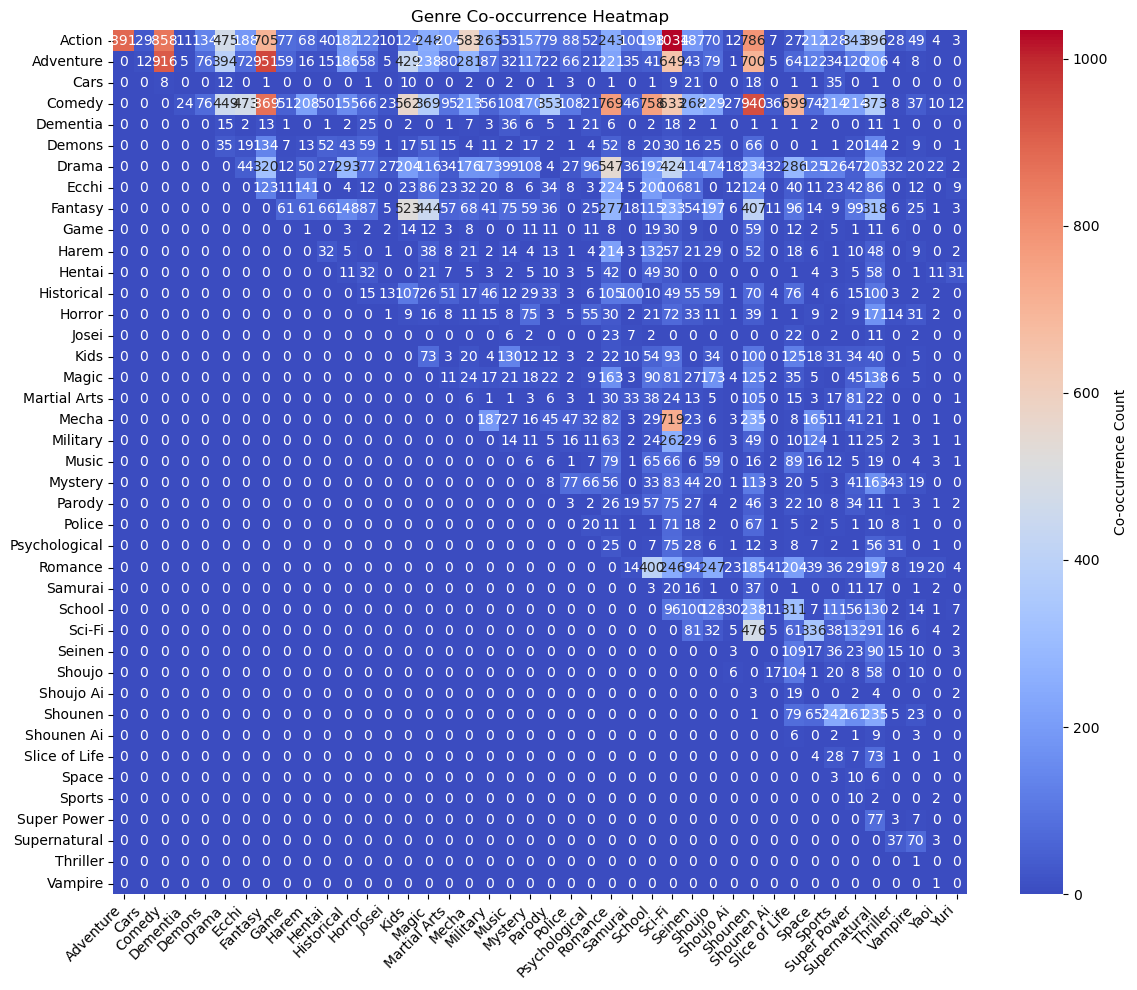

In [19]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Genre Co-occurrence Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [20]:
# Get the top 10 most common genre pairs
top_10_pairs = genre_pair_counts.most_common(10)

# Create a DataFrame from the top 10 pairs
top_10_df = pd.DataFrame(top_10_pairs, columns=['Genre Pair', 'Count'])

# Split the Genre Pair into two separate columns
top_10_df[['Genre1', 'Genre2']] = pd.DataFrame(top_10_df['Genre Pair'].tolist(), index=top_10_df.index)

# Create a pivot table for the heatmap
heatmap_data_top_10 = top_10_df.pivot(index='Genre1', columns='Genre2', values='Count').fillna(0)
heatmap_data_top_10

Genre2,Adventure,Comedy,Fantasy,Romance,School,Sci-Fi,Shounen
Genre1,,,,,,,
Action,891.0,858.0,0.0,0.0,0.0,1034.0,786.0
Adventure,0.0,916.0,951.0,0.0,0.0,0.0,0.0
Comedy,0.0,0.0,869.0,769.0,758.0,0.0,940.0


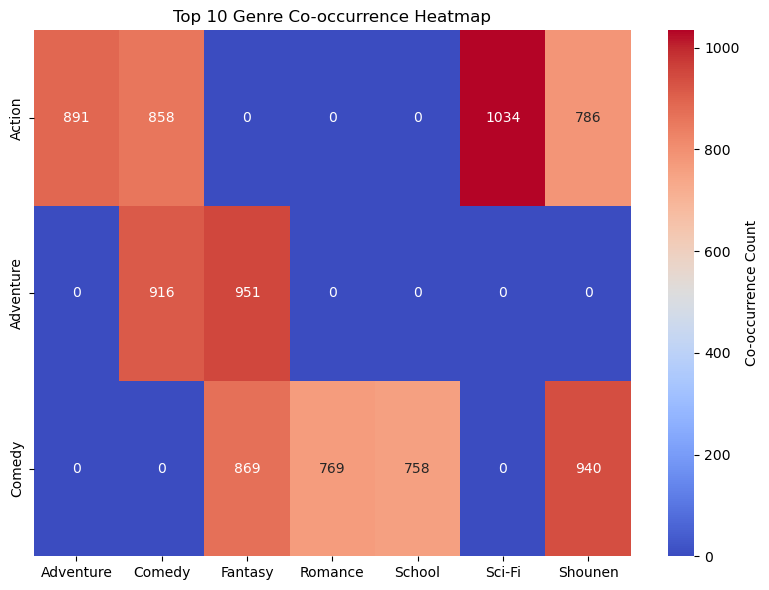

In [21]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_top_10, cmap='coolwarm', annot=True, fmt=".0f", cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Top 10 Genre Co-occurrence Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()